In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("D:\Personal projects\EMPLOYEE ATTRITION\EAA\HR-Employee-Attrition.csv")




In [2]:
# Encode categorical variables as binary values
df = pd.get_dummies(df, columns=["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Over18"])



In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Attrition", axis=1), df["Attrition"], test_size=0.2, random_state=42)



In [4]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Accuracy: 0.8673469387755102
Confusion matrix:
[[255   0]
 [ 39   0]]


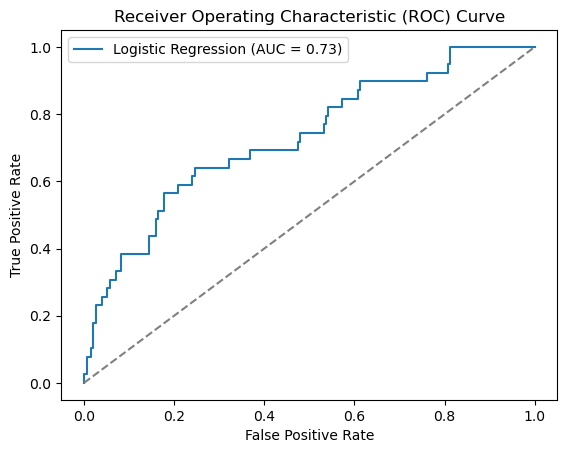

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['No']. Make sure that the predictions provided by the classifier coincides with the true labels.

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Map the string values to numeric values
y_test_numeric = y_test.map({"No": 0, "Yes": 1})
y_pred_numeric = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)

# Calculate the AUC (Area Under the Curve) score
auc = roc_auc_score(y_test_numeric, y_pred_numeric)

# Plot the ROC curve
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# Predict the class labels
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
